## **Belajar Pengembangan Machine Learning**
---
**Proyek Akhir - Image Classification Model Deployment**

**Nama**: Ardina Dana Nugraha

**Dataset yang digunakan**: Malaria Dataset, diperoleh dari https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

## **Import Modul**

In [45]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import splitfolders
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras import models
import pathlib
import cv2
import os

## **Membaca Dataset**

Sea Animals Dataset dibaca terlebih dahulu.

In [2]:
dataset = r"cell_images"

kelas = [class_name for class_name in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, class_name))]

banyak_citra=0
for class_name in kelas:
    class_path = os.path.join(dataset, class_name)
    image_files = [file for file in os.listdir(class_path) if file.lower().endswith(('.jpg','.png'))]
    number_of_images = len(image_files)
    banyak_citra=banyak_citra+number_of_images
print("Banyak citra =",banyak_citra)
print("\nDaftar kelas =",kelas,"\n\nBanyak kelas =", len(kelas))

Banyak citra = 27558

Daftar kelas = ['Parasitized', 'Uninfected'] 

Banyak kelas = 2


In [4]:
def show_image_shapes(dataset_path):
    listUkuran = set()
    image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

    for image_file in image_files:
        image_path = os.path.join(dataset_path, image_file)
        image = cv2.imread(image_path)

        if image is not None:
            image_shape = image.shape
            listUkuran.add(image_shape)
    print(listUkuran,"\n")

    print("Kesimpulan".center(100,"─"))
    if (len(listUkuran)>1):
        print("Dataset memiliki ukuran resolusi yang berbeda-beda.")
    elif len(listUkuran==1):
        print("Dataset memiliki ukuran resolusi yang sama.")

dataset_path = dataset+"/Parasitized"
show_image_shapes(dataset_path)

{(190, 190, 3), (127, 166, 3), (106, 154, 3), (247, 229, 3), (115, 148, 3), (154, 103, 3), (94, 127, 3), (127, 196, 3), (58, 64, 3), (148, 187, 3), (145, 130, 3), (124, 118, 3), (130, 154, 3), (232, 196, 3), (157, 187, 3), (133, 112, 3), (103, 97, 3), (112, 100, 3), (190, 163, 3), (193, 130, 3), (199, 166, 3), (151, 118, 3), (145, 160, 3), (91, 79, 3), (124, 148, 3), (130, 184, 3), (178, 145, 3), (103, 127, 3), (136, 196, 3), (190, 193, 3), (169, 181, 3), (124, 178, 3), (103, 157, 3), (115, 151, 3), (154, 106, 3), (79, 88, 3), (127, 199, 3), (166, 154, 3), (220, 151, 3), (145, 142, 3), (154, 136, 3), (124, 121, 3), (79, 118, 3), (133, 115, 3), (112, 103, 3), (166, 184, 3), (124, 151, 3), (139, 103, 3), (133, 145, 3), (118, 82, 3), (193, 163, 3), (151, 151, 3), (91, 112, 3), (196, 142, 3), (124, 181, 3), (178, 178, 3), (175, 121, 3), (154, 109, 3), (184, 115, 3), (118, 112, 3), (163, 103, 3), (97, 100, 3), (88, 85, 3), (76, 79, 3), (175, 151, 3), (148, 103, 3), (154, 139, 3), (208, 136,

Kode di atas menunjukkan bahwa dataset memiliki ukuran resolusi yang berbeda-beda.

## **Split Data Training dan Testing**
Dataset dibagi menjadi rasio training:testing 80:20.

In [5]:
splitfolders.ratio(dataset, output="datasetSplit", seed=1307, ratio=(0.8, 0.0, 0.2))

Copying files: 27560 files [03:50, 119.64 files/s]


In [6]:
IMAGE_SIZE = (100, 100, 3)
dataset="datasetSplit"
train_path = dataset+'/train'
test_path = dataset+'/test'

In [7]:
print(len(train_path))

18


Banyak citra di training set: 22048
Banyak citra di testing set: 5512
Total citra: 27560


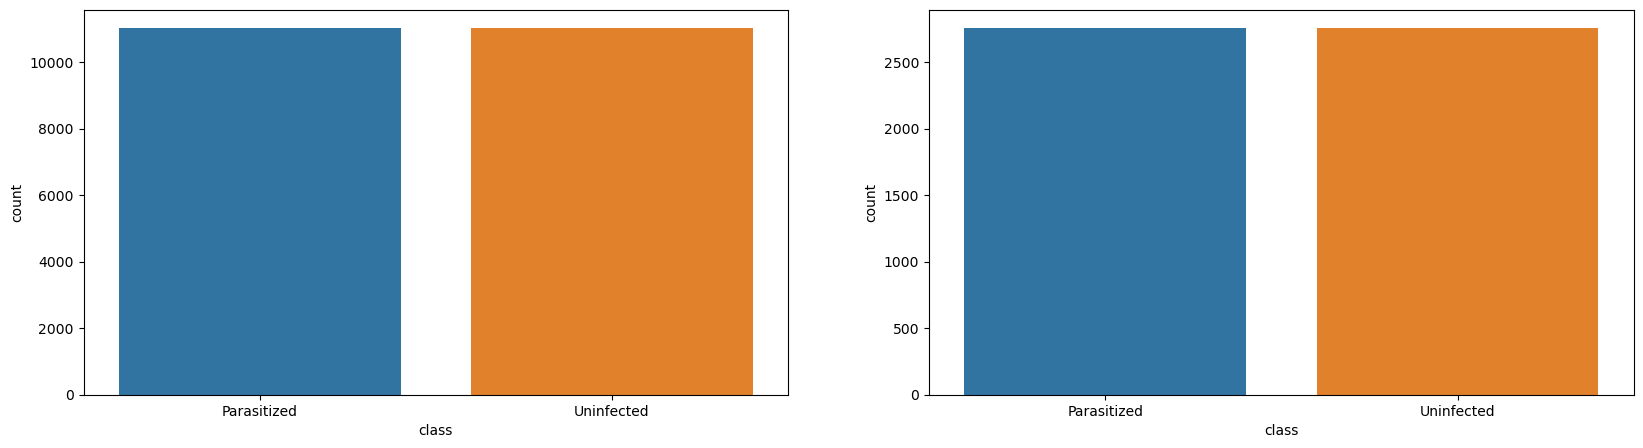

In [8]:
quantity_train = {} 
quantity_test = {}
for folder in os.listdir(train_path):
    quantity_train[folder] = len(os.listdir(train_path+'/'+folder))

for folder in os.listdir(test_path):
    quantity_test[folder] = len(os.listdir(test_path+'/'+folder))

quantity_train = pd.DataFrame(list(quantity_train.items()), index=range(0,len(quantity_train)), columns=['class','count'])
quantity_test = pd.DataFrame(list(quantity_test.items()), index=range(0,len(quantity_test)), columns=['class','count'])

figure, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='class',y='count',data=quantity_train,ax=ax[0])
sns.barplot(x='class',y='count',data=quantity_test,ax=ax[1])

print("Banyak citra di training set:", sum(quantity_train['count'].values))
print("Banyak citra di testing set:",sum(quantity_test['count'].values))
print("Total citra:",sum(quantity_train['count'].values)+sum(quantity_test['count'].values))

plt.show()

In [9]:
def save_history(history, model_name):
    #convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save ke json 
    hist_json_file = 'model_name'+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)

    # or save ke csv 
    hist_csv_file = 'model_name'+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
def plot_accuracy_from_history(history, isinception=False):
  try:
    color = sns.color_palette()
    if(isinception == False):
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    else:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
    

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label='Training Accuracy')
    sns.lineplot(epochs, val_acc,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def plot_loss_from_history(history):
  try:
    color = sns.color_palette()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    sns.lineplot(epochs, loss,label='Training Loss')
    sns.lineplot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()
    plt.show()
  except TypeError:
    pass
    
def do_history_stuff(i, history, history_file_name, isinception=False):
    save_history(i, history, history_file_name)
    plot_accuracy_from_history(history, isinception)
    plot_loss_from_history(history)

In [10]:
tf.keras.backend.clear_session()

## **Image Data Generator**

In [11]:
#normalisasi
train_datagen = ImageDataGenerator(rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    target_size=(100, 100))

test_datagen = ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.4)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


## **Model Training**

In [36]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

In [37]:
acc_thresh = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>acc_thresh and logs.get('val_acc')>acc_thresh):
            print("Akurasi mencapai 95% yaitu",logs.get('acc'),"dan akurasi validasi sebesar",logs.get('val_acc'))
            self.model.stop_training = True

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
epoch = 100
model.compile(loss = 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])

filepath = 'saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, validation_data = test_generator, epochs=epoch, batch_size = 32, callbacks=[checkpoint,myCallback()], verbose=2)

Epoch 1/100

Epoch 1: val_acc improved from -inf to 0.57130, saving model to saved-model-01-acc-0.57.hdf5
689/689 - 348s - loss: 0.6908 - acc: 0.6416 - val_loss: 0.6809 - val_acc: 0.5713 - 348s/epoch - 505ms/step
Epoch 2/100

Epoch 2: val_acc improved from 0.57130 to 0.67090, saving model to saved-model-02-acc-0.67.hdf5
689/689 - 335s - loss: 0.5511 - acc: 0.7229 - val_loss: 0.6524 - val_acc: 0.6709 - 335s/epoch - 487ms/step
Epoch 3/100

Epoch 3: val_acc improved from 0.67090 to 0.83436, saving model to saved-model-03-acc-0.83.hdf5
689/689 - 319s - loss: 0.4101 - acc: 0.8271 - val_loss: 0.4289 - val_acc: 0.8344 - 319s/epoch - 463ms/step
Epoch 4/100

Epoch 4: val_acc improved from 0.83436 to 0.90729, saving model to saved-model-04-acc-0.91.hdf5
689/689 - 317s - loss: 0.3138 - acc: 0.8815 - val_loss: 0.2611 - val_acc: 0.9073 - 317s/epoch - 461ms/step
Epoch 5/100

Epoch 5: val_acc did not improve from 0.90729
689/689 - 316s - loss: 0.2645 - acc: 0.9055 - val_loss: 0.2936 - val_acc: 0.8980

In [39]:
model.save('model.h5')

## **Plot Akurasi dan Loss**

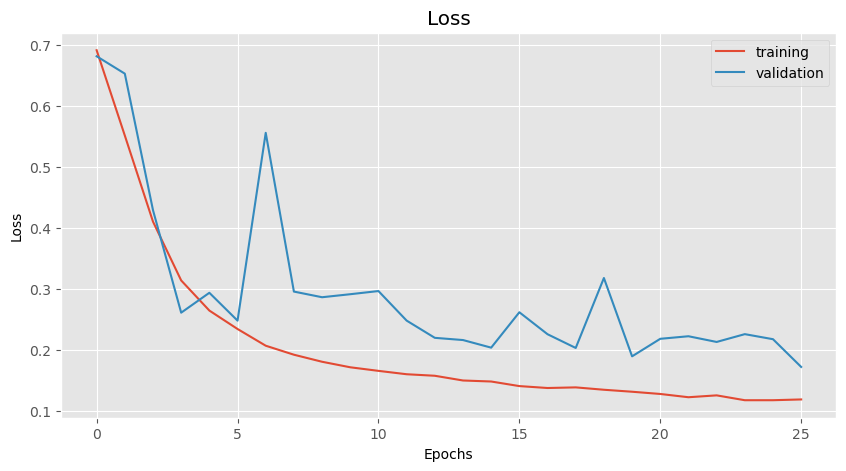

In [41]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

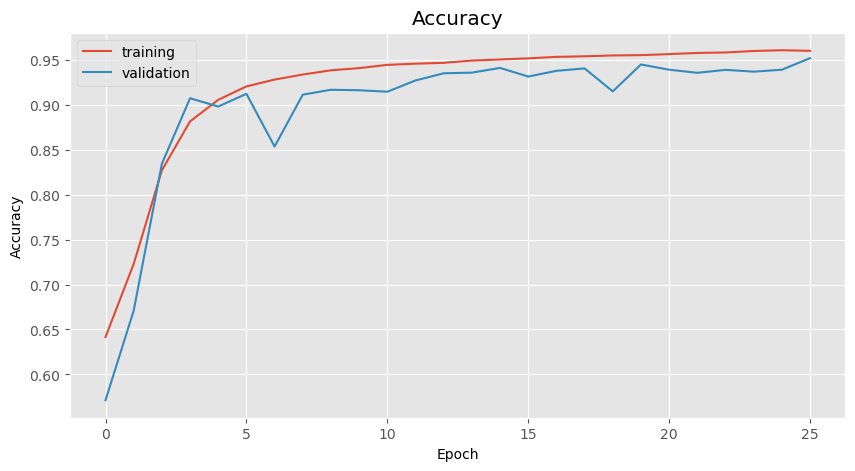

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## **Konversi ke TFLite**

In [43]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


6936008